#### Standard imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use("ggplot")

In [3]:
# load clean data
train_df = pd.read_csv('../data/train_cleaned.csv')
store_df = pd.read_csv('../data/store_711_en.csv')
bkk_zone_df = pd.read_csv('../data/bkk_zone.csv')

In [4]:
# define graph palette
palette = ["#ffb4bfff","#fbfbaaff","#ffc7f0ff","#d2ffbeff","#ffd380ff","#b9cdffff"]

In [5]:
# reviw bangkok zone name
bkk_zone_df.head()

,zone_name,district_en
0,Zone 1,Bang Phlat
1,Zone 1,Dusit
2,Zone 1,Bangkok Noi
3,Zone 1,Pom Prap Sattru Phai
4,Zone 1,Phra Nakhon


In [6]:
# Merge store with Bangkok zone
store_zone_df = pd.merge(left=store_df, right=bkk_zone_df)

In [7]:
# review store with zone name
store_zone_df.head()

,store_code,district_en,sub_district_en,province_en,latitude,longitude,zone_name
0,16181,Bang Khun Thian,Tha Kham,Bangkok,13.549793,100.420630,Zone 6
1,18121,Bang Khun Thian,Tha Kham,Bangkok,13.572393,100.421720,Zone 6
2,14611,Bang Khun Thian,Tha Kham,Bangkok,13.571103,100.440200,Zone 6
3,16807,Bang Khun Thian,Tha Kham,Bangkok,13.582354,100.427109,Zone 6
4,10363,Bang Khun Thian,Samae Dam,Bangkok,13.590910,100.387831,Zone 6


#### Visualize condo data in bangkok

In [9]:
# count store group by zone name
graph_store_zone = store_zone_df.groupby('zone_name')['province_en'].value_counts().reset_index()

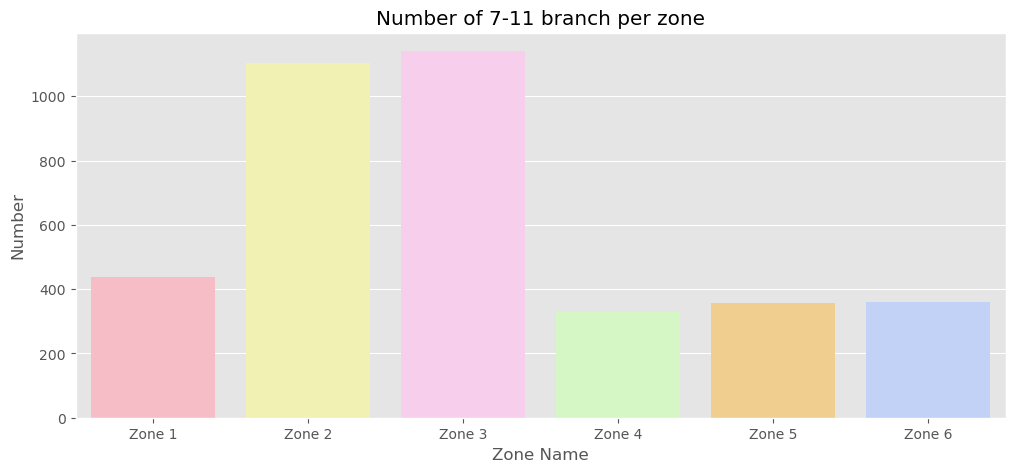

In [10]:
# plot number of store per zone
plt.figure(figsize=(12,5))
sns.barplot(x='zone_name', y='count', hue='zone_name', data=graph_store_zone, palette=palette)
plt.xlabel('Zone Name')
plt.ylabel('Number')
plt.title('Number of 7-11 branch per zone');
plt.savefig('../figures/zone_store_711.png')

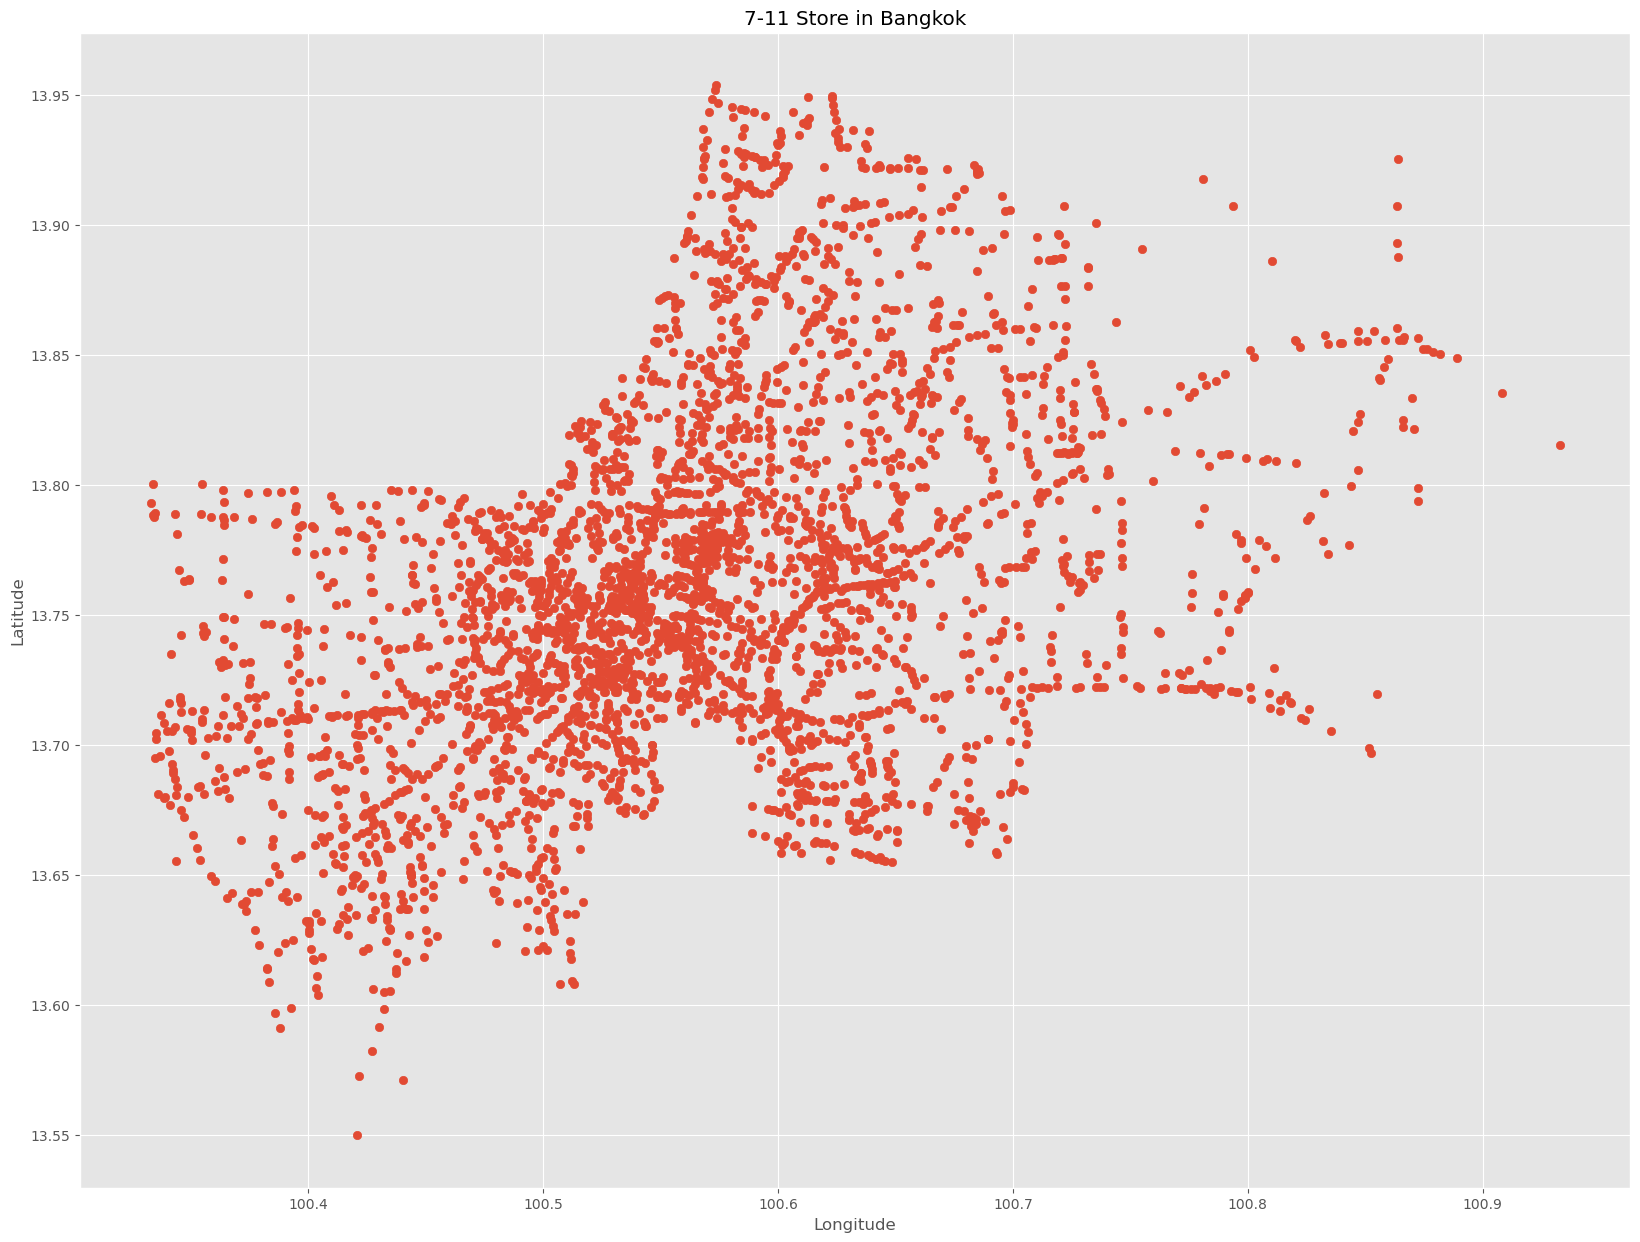

In [11]:
plt.figure(figsize=(20,15))
plt.scatter(x=store_df['longitude'], y=store_df['latitude'])
plt.title('7-11 Store in Bangkok')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('../figures/map_store_711.png')
plt.show();

#### Review values range and outliers

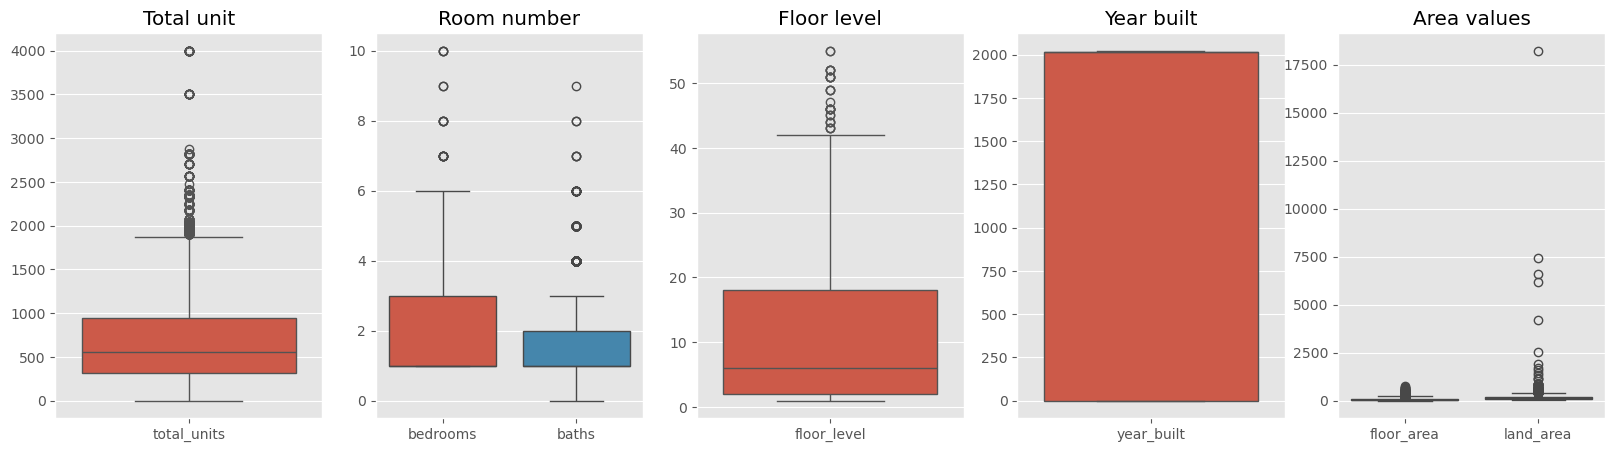

In [13]:
# plot features value distribitions
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
#plt,5.figure(figsize=(5,5))
sns.boxplot(data=train_df[['total_units']], ax=ax[0])
ax[0].set_title('Total unit')

# plot room number distribitions
sns.boxplot(data=train_df[['bedrooms','baths']], ax=ax[1])
ax[1].set_title('Room number');

# plot floar level distribitions
sns.boxplot(data=train_df[['floor_level']], ax=ax[2])
ax[2].set_title('Floor level')

# plot floor level distribitions
sns.boxplot(data=train_df[['year_built']], ax=ax[3])
ax[3].set_title('Year built')

# plot area value distribitions
sns.boxplot(data=train_df[['floor_area','land_area']], ax=ax[4])
ax[4].set_title('Area values');

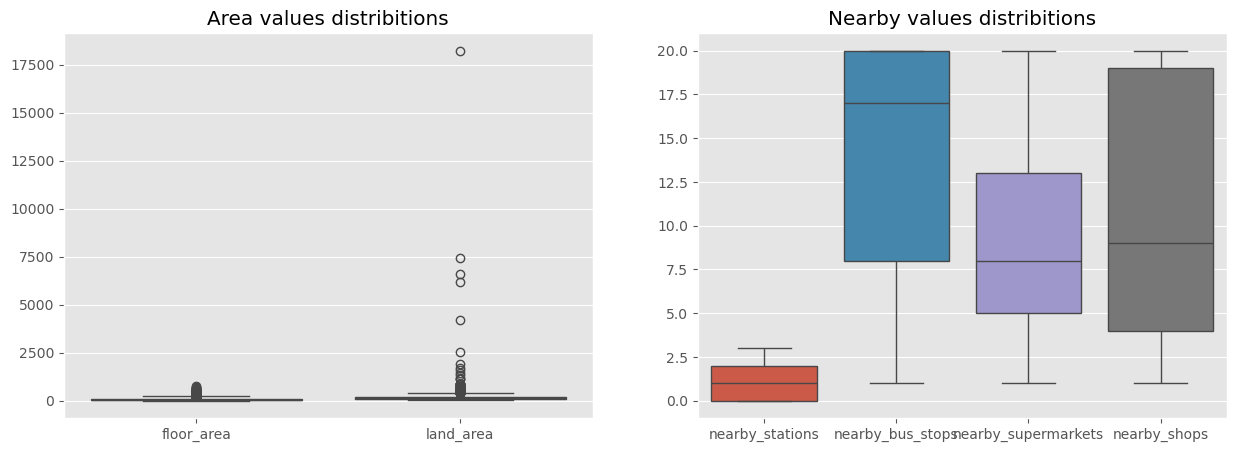

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plot area value distribitions
sns.boxplot(data=train_df[['floor_area','land_area']], ax=ax[0])
ax[0].set_title('Area values distribitions')

sns.boxplot(data=train_df[['nearby_stations',
                           'nearby_bus_stops','nearby_supermarkets','nearby_shops']], ax=ax[1])
ax[1].set_title('Nearby values distribitions');

#### Review features correlations

<Axes: >

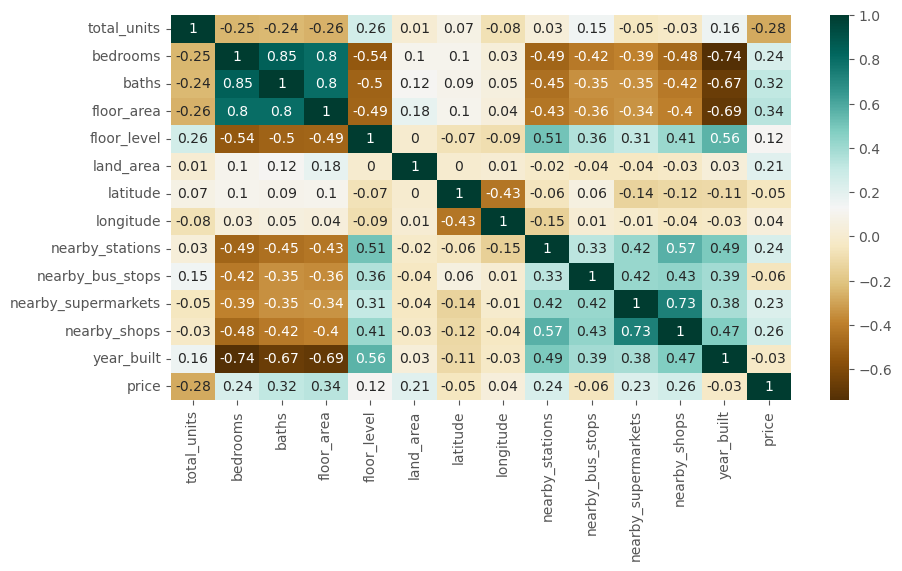

In [16]:
plt.figure(figsize=(10, 5))
features = ['total_units','bedrooms','baths','floor_area','floor_level','land_area','latitude',
            'longitude','nearby_stations','nearby_bus_stops','nearby_supermarkets','nearby_shops','year_built','price']
sns.heatmap(data=train_df[features].corr().round(2), annot=True, cmap='BrBG')

#### Visualize condo data in bangkok

In [18]:
# Filtering only Condo in Bangkok
condo_df = train_df[(train_df['property_type'] == 'Condo') & (train_df['province'] == 'Bangkok')]
# Rename column from district to district_en 
condo_df = condo_df.rename(columns={"district": "district_en"})
# Merge condo data with bkk zone
condo_df = pd.merge(left=condo_df, right=bkk_zone_df)

In [19]:
# Remove Duplicate by assuming that the same condo have the same 'latitude' and 'longitude'
condo_uniq_addr_df = condo_df.drop_duplicates(subset=['latitude', 'longitude'], keep='first')
condo_uniq_addr_df_zone = condo_uniq_addr_df.groupby('zone_name')['id'].count().reset_index()
# show number condo project in Bangkok
condo_uniq_addr_df_zone

,zone_name,id
0,Zone 1,97
1,Zone 2,692
2,Zone 3,253
3,Zone 4,14
4,Zone 5,33
5,Zone 6,30


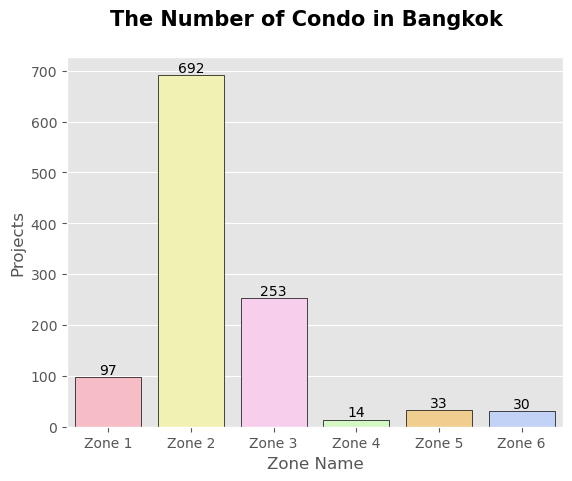

In [20]:
# Visualize The number of Condo in Bangkok in the Dataset
ax = sns.barplot(x='zone_name', y='id', data=condo_uniq_addr_df_zone,palette=palette, hue='zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Number of Condo in Bangkok', fontsize=15, fontweight="bold")
plt.xlabel('Zone Name')
plt.ylabel('Projects')
plt.savefig('../figures/condo_in_bkk.png');

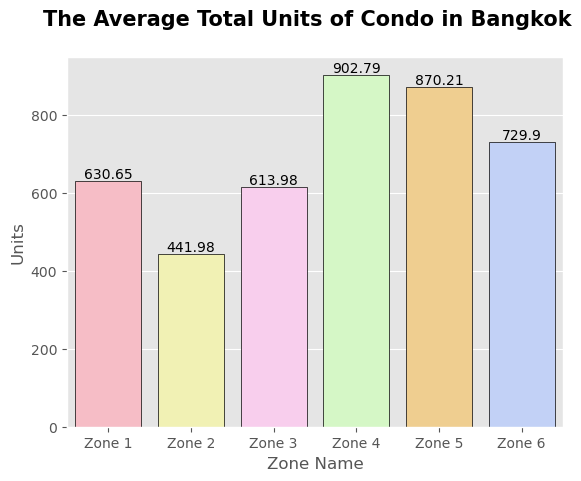

In [21]:
# Visualize The Average Total Units of Condo in Bangkok in the Dataset
ax = sns.barplot(x = 'zone_name', y = 'total_units', data=condo_uniq_addr_df.groupby('zone_name')['total_units'].mean().round(2).reset_index(), \
                 palette=palette, hue = 'zone_name',edgecolor='black');
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
ax.bar_label(ax.containers[3], fontsize=10)
ax.bar_label(ax.containers[4], fontsize=10)
ax.bar_label(ax.containers[5], fontsize=10)
plt.suptitle('The Average Total Units of Condo in Bangkok', fontsize=15, fontweight="bold")
plt.xlabel('Zone Name')
plt.ylabel('Units')
plt.savefig('../figures/condo_unit_bkk.png');